In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress, skew
import string
import datetime
from matplotlib.gridspec import GridSpec


(c1,c2,c3,c4)=('#1b9e77','#d95f02','#7570b3','#e7298a')
colors = [c2,c3,c1]

In [2]:
met_dict = pickle.load(open('met_dict.p','rb'))

49456
48280


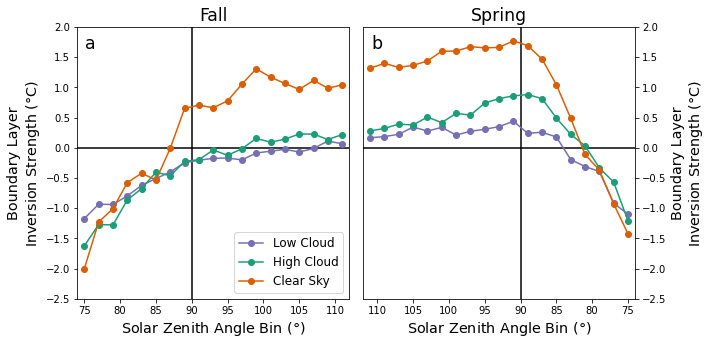

In [3]:
names = ['Low Cloud','High Cloud','Clear Sky']

bw=2
max_SZA = 111.1
min_SZA = 75
ranger = np.arange(min_SZA,max_SZA,bw)


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))


for regime, ax in zip(['Fall','Spring'],[ax1,ax2]):
    
    df = pickle.load(open('big_df.p','rb'))

    df = df[df['zenith']<120]
    
    if regime == 'Spring':
        df = df[np.isin(df['month'],[1,2,3,4])]
    elif regime == 'Fall':
        df = df[np.isin(df['month'],[9,10,11,12])]
    
    print(df.shape[0])

    df_cloudy_low = df[df['Low cloudiness']>9]
    df_clear_total = df[df['Total cloudiness']<1]
    df_clear_low = df[df['Low cloudiness']<1]
    df_cloudy_high = df_clear_low[df_clear_low['Total cloudiness']>9]

    binned = {'means':{},
              'stds':{},
              'wind':{}}

    for name in names:
        binned['means'][name] = []
        binned['stds'][name] = []
        binned['wind'][name] = []


    for i in ranger:

        for df,name in zip([df_cloudy_low,df_cloudy_high,df_clear_total],names):

            x = df[df['zenith']<i+bw/2]
            x = x[x['zenith']>i-bw/2]
            mean = np.nanmean(x['diff'])
            std = np.nanstd(x['diff'])


            binned['means'][name].append(mean)
            binned['stds'][name].append(std)
            binned['wind'][name].append(np.nanmean(x['Wind speed']))


    for name,color,offset in zip(names,[c3,c1,c2],[-1,0,1]):

        ax.plot(ranger,
                 binned['means'][name],
                 label=name,color=color,zorder=5,
                 marker='o',
                )

    ax.axhline(0,color='k')

    xticklabels = [f'{int(r-bw/2)} - {int(r+bw/2)}' for r in ranger]
    ax.set_xticks(np.arange(70,111,5))

    ax.set_ylim(-2.5,2)

    ax.set_xlabel('Solar Zenith Angle Bin ($\degree$)',fontsize='x-large')
    ax.set_ylabel('Boundary Layer\nInversion Strength ($\degree$C)',fontsize='x-large')

    ax.axvline(90,color='k')
    
    ax.set_title(regime,fontsize='xx-large')
    
    if regime == 'Spring':
        ax.set_xlim(112,74)
    else:
        ax.set_xlim(74,112)
    
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

for ax,letter in zip([ax1,ax2],string.ascii_letters):
    
    ax.annotate(f'{letter}',
                xycoords='axes fraction',
                xy=(0.03,0.97),
                va='top',
                fontsize='xx-large')

ax1.legend(loc='lower right',fontsize='large')

fig.subplots_adjust(wspace=0.05)

plt.savefig(f'/home/robbie/Dropbox/Apps/Overleaf/Inversion/main_figs/SZA_below_horizon.png',dpi=400,bbox_inches='tight')    

plt.show()

In [4]:
names = ['Low Cloud','High Cloud','Clear Sky']

max_SZA = 111.1
min_SZA = 75

ranger = np.arange(min_SZA,max_SZA,0.1)


for regime, ax in zip(['Fall','Spring'],[ax1,ax2]):
    
    df = pickle.load(open('big_df.p','rb'))

    df = df[df['zenith']<120]
    
    if regime == 'Spring':
        df = df[np.isin(df['month'],[1,2,3,4])]
    elif regime == 'Fall':
        df = df[np.isin(df['month'],[9,10,11,12])]
    
    df_cloudy_low = df[df['Low cloudiness']>9]
    df_clear_total = df[df['Total cloudiness']<1]
    df_clear_low = df[df['Low cloudiness']<1]
    df_cloudy_high = df_clear_low[df_clear_low['Total cloudiness']>9]

    binned = {'means':{},
              'SZA':{}}

    for name in names:
        binned['means'][name] = []
        binned['SZA'][name] = []


    for i in ranger:

        for df,name in zip([df_cloudy_low,df_cloudy_high,df_clear_total],names):

            x = df[df['zenith']<i+1]
            x = x[x['zenith']>i-1]
            
            mean = np.nanmean(x['diff'])

            binned['means'][name].append(mean)
            binned['SZA'][name].append(i)
            
    print(regime)
    
    for name in names:
        SZAs = np.array(binned['SZA'][name])
        means = np.array(binned['means'][name])
        print(name)
        print(SZAs[::-1][np.argwhere(means[::-1]<0)][0][0])
            
            
        

Fall
Low Cloud
107.09999999999818
High Cloud
97.09999999999874
Clear Sky
86.99999999999932
Spring
Low Cloud
83.99999999999949
High Cloud
80.69999999999968
Clear Sky
81.29999999999964


49456
48280


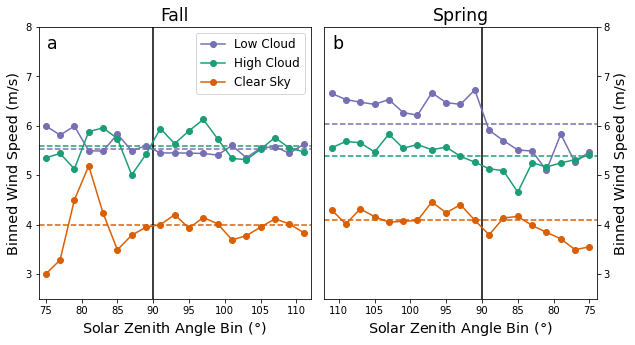

In [14]:
names = ['Low Cloud','High Cloud','Clear Sky']

bw=2
max_SZA = 111.1
min_SZA = 75
ranger = np.arange(min_SZA,max_SZA,bw)


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))


for regime, ax in zip(['Fall','Spring'],[ax1,ax2]):
    
    df = pickle.load(open('big_df.p','rb'))

    df = df[df['zenith']<120]
    
    if regime == 'Spring':
        df = df[np.isin(df['month'],[1,2,3,4])]
    elif regime == 'Fall':
        df = df[np.isin(df['month'],[9,10,11,12])]
    
    print(df.shape[0])

    df_cloudy_low = df[df['Low cloudiness']>9]
    df_clear_total = df[df['Total cloudiness']<1]
    df_clear_low = df[df['Low cloudiness']<1]
    df_cloudy_high = df_clear_low[df_clear_low['Total cloudiness']>9]

    binned = {'means':{},
              'stds':{},
              'wind':{}}

    for name in names:
        binned['means'][name] = []
        binned['stds'][name] = []
        binned['wind'][name] = []


    for i in ranger:

        for df,name in zip([df_cloudy_low,df_cloudy_high,df_clear_total],names):

            x = df[df['zenith']<i+bw/2]
            x = x[x['zenith']>i-bw/2]
            mean = np.nanmean(x['Wind speed'])
            std = np.nanstd(x['Wind speed'])


            binned['means'][name].append(mean)
            binned['stds'][name].append(std)
            binned['wind'][name].append(np.nanmean(x['Wind speed']))
            


    for name,color,offset in zip(names,[c3,c1,c2],[-1,0,1]):

        ax.plot(ranger,
                 binned['means'][name],
                 label=name,color=color,zorder=5,
                 marker='o',
                )
        
        ax.axhline(np.nanmean(binned['means'][name])+offset/22,color=color,ls='--')

#     ax.axhline(0,color='k')

    xticklabels = [f'{int(r-bw/2)} - {int(r+bw/2)}' for r in ranger]
    ax.set_xticks(np.arange(70,111,5))

    ax.set_ylim(2.5,8)

    ax.set_xlabel('Solar Zenith Angle Bin ($\degree$)',fontsize='x-large')
    ax.set_ylabel('Binned Wind Speed (m/s)',fontsize='x-large')

    ax.axvline(90,color='k')
    
    ax.set_title(regime,fontsize='xx-large')
    
    if regime == 'Spring':
        ax.set_xlim(112,74)
    else:
        ax.set_xlim(74,112)
    
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

for ax,letter in zip([ax1,ax2],string.ascii_letters):
    
    ax.annotate(f'{letter}',
                xycoords='axes fraction',
                xy=(0.03,0.97),
                va='top',
                fontsize='xx-large')

ax1.legend(loc='upper right',fontsize='large')

fig.subplots_adjust(wspace=0.05)

plt.savefig(f'/home/robbie/Dropbox/Apps/Overleaf/Inversion/supp_figs/SZA_wind_speed.png',dpi=400,bbox_inches='tight')    

plt.show()